In [1]:
import seaborn as sbn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("C:\\Users\\Computer\\Desktop\\Software\\AI\\NumpyPandasMatplotlib\\WholeDataScienceFiles\\merc.xlsx")

In [3]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


# VERİ ANALİZİ

In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()
# isnull bize true false şeklinde boş veri var mı onu gösterir sum() ekleyince de 
# bize özetini gösteriyor

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\Computer\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

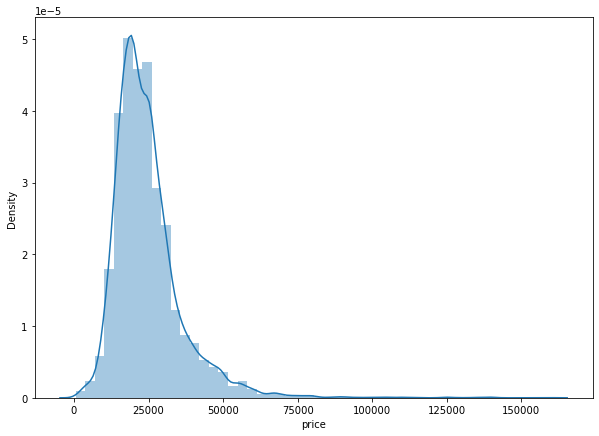

In [6]:
plt.figure(figsize=(10,7))
# seaborn matplotlib üzerine kurulduğu için matplotlib den boyutunu arttırdık grafiğin
sbn.distplot(dataFrame["price"])
# ücrete göre grafik çizdirdik. Bu dağılımı gösteren bir grafik
# bu çizdirdiğimiz grafiğe bakarak veri setimizde çok yüksek fiyata satılan ve verinin tutarlılığını bozan verilerin olduğu
# sonucuna vardık. Bu verileri istersek veri setimizden temizleriz istemessek temizlemeyiz. Ama çok hassas bir veri analizi
# yapıyorsak bunları veri setimizden temizlememiz gerekir.

C:\Users\Computer\.conda\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

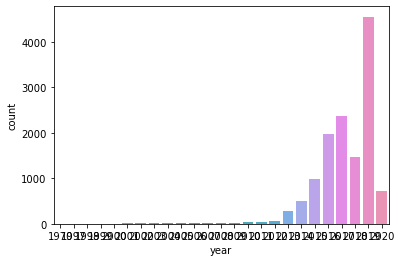

In [7]:
sbn.countplot(dataFrame["year"])
# bu sadece sayılarını gösteren bir grafik

In [8]:
dataFrame.corr()
# bu bize verilerin diğer verilerle arasındaki ilişkiyi gösterir

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame.corr()["price"].sort_values()
# burda ise sadece price kolonunun diğer verilerle alakasını aldık. sort_values() ile ise değerleri
# küçükten büyüğe sırala dedik

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

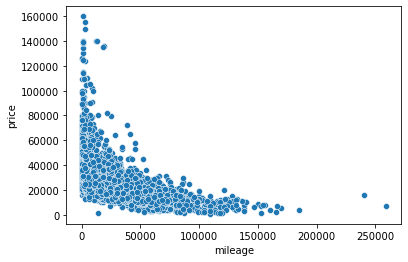

In [10]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame)
# çizgi grafiğinde ücretin mileage'e göre değişimini seaborn ile çizdik

In [11]:
dataFrame.sort_values("price", ascending = False).head(20)
# dataFrame'mimizin ücrete göre sıralamaısını yaptırdık ascending false demek en yüksekten en düşüğe göre sıralar
# head(20) ile ilk 20 veriyi getirdik. True yaparsak eğer ucuzdan pahalıya doğru sıralar.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


# DATA TEMİZLİĞİ

In [12]:
# şuanki verimizde bizim verimizin bütünlüğünü bozan çok pahalı bir kaç araba var
# bir verinin %99 ile işlem yaparsan o verinin doğruluğunu bozmassın bu yüzden bizde en pahalı 
# 131 arabayı bulup onları datasetimizden atıcaz

In [13]:
yüzdeDoksanDokuzDF = dataFrame.sort_values("price", ascending = False).iloc[131:]
# bizim ihtiyacımız olan şey en pahalı arabaların 131'ini atmaktı yukarıda yaptığımız şeyde pahalıdan düşüğe doğru sıralıyoruz
# sonrasında ise index'e göre sırala diyerek 131. index den başlayarak göster diyoruz bu index row'lar için geçerli
# böylece verimizi elde etmiş oluyoruz.
yüzdeDoksanDokuzDF

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


C:\Users\Computer\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

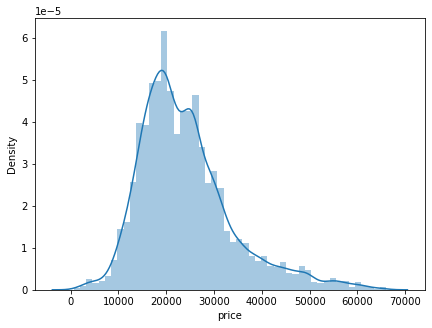

In [14]:
plt.figure(figsize=(7,5))
sbn.distplot(yüzdeDoksanDokuzDF["price"])
# yeni verimizi çizdirdik datamız daha iyi oldu.

In [15]:
dataFrame.groupby("year").mean()["price"]
# yıla göre grupla sonra price'ın ortalamasını alarak getir dedik

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [16]:
yüzdeDoksanDokuzDF.groupby("year").mean()["price"]
# bu da pahalı arabaların atılmış hali ama 1970 yılında 25k satılan arabalar var bu arabaların
# bu fiyata satılması verinin bütünlüğünü bozuyor o arabalar muhtemelen özel bir şeye sahip yani tahmin edilmeyi 
# zorlaştırır bu yüzden bu kısmı da atıcaz

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [17]:
yüzdeDoksanDokuzDF[yüzdeDoksanDokuzDF.year !=1970].groupby("year").mean()["price"]
# yukarıda verimizde 1970'e eşit olmayan tarihleri yıla göre grupla ve ücretin ortalamasını alarak getir dedik
# yüzdeDoksanDokuzDF.year yapmak burda işe yarıyor ama normalde yüzdeDoksanDokuzDF["year"] böyle çağırılır normalde

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [18]:
temizDataFrame = yüzdeDoksanDokuzDF[yüzdeDoksanDokuzDF.year !=1970]
temizDataFrame
# 1970 yılı ve gereksiz pahalı olan arabaların atılmış hali olan veri

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [19]:
temizDF = temizDataFrame.drop("transmission", axis=1)
# bu veri numeric değil de kategorik olduğu için bu veriyi düşürdük axis=1 dememizin sebebi ise kolonu komple at demek
temizDF.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


# MODEL OLUŞTURMA

In [47]:
y = temizDF["price"].values
# values diyerek bunu bir numpy arrey'ine dönüştürdük
x = temizDF.drop("price", axis=1).values
# price kolonunu komple düşürüp geri kalan kolonları aldık ve numpy arrey'ine dönüştürdük.

In [48]:
from sklearn.model_selection import train_test_split
# train test kümesi oluşturmak için çağırdık

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
# random_state verimizi rastgele bölüyor ama birdahaki sefere aynı rastgelelikde bölmek istersen diye numaralar var
# bu numara ile aynı rastgeleliği kullanabilirsin birdahaki seferede

In [50]:
from sklearn.preprocessing import MinMaxScaler
# verilerimizi ölçeklendirmek için bunları scale edicez x lerden yani değişkenlerden y'leri tahmin ettiğimiz için
# sadece x leri yani değişkenleri tutan değişkeni ölçeklendiriyoruz

In [51]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# bu sefer scaler objemize nasıl scale etmesi gerektiğini hem öğretip hemde scale ettik yani iki işi aynı anda yaptık

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
x_train.shape
# 5 tane özellik olduğu için başlangıç olarak en az 5 nöron ile başlamamız gerek ama biz 12 ile başlıcaz çünkü atıl
# hoca zaten bu veri seti üzerinde çalışmış ve 12'nin daha iyi çalıştığını görmüş

(9090, 5)

In [53]:
model = Sequential()

model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
# bunlar ara katmanlar

model.add(Dense(1,activation="relu"))
# bu çıkış katman

model.compile(optimizer="adam", loss="mse")
# bu da compile ederken kullandığımız optimizer bunu bu sefer adam olarka seçtik. Loss fonksiyonu olarak ise
# mse seçtik.

In [54]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300)
# burda öğretme işleminde validation_data değerlerine x_test ve y_test vererek daha önce manuel olarak yaptığımız
# x_test'den tahmin edilen ile gerçek y_test verisi değerlerininin kıyaslanma işlemini daha kolay bir hale getiricek
# batch_size=300 vermemizin sebebi ise elimizde 13k veri var bu 13k veriyi aynı anda modelimize vermek modelimizi yorabilir
# bu yüzden 300 300 vericez modelimize
# test veri kümelerini de vermemiz val_loss'un ortaya çıkmasına sebep oldu bu da doğrulama loss'u oluyor.
# eğer bunu bir kaç defa çalıştırırsak sanırsam ezberlemeye gidiyor. Bu da iyi bir şey değil.

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 678886885.0526 - val_loss: 688103680.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 682596153.2632 - val_loss: 688071040.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 681105113.2632 - val_loss: 687950592.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 671112687.1579 - val_loss: 687542720.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 672128151.5789 - val_loss: 686280768.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 665765623.5789 - val_loss: 682875840.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 662930592.0000 - val_loss: 674933952.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 660190374.7368 - val_loss: 659127808.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6313709

37/37 [==============================] - 0s 3ms/step - loss: 65103510.5263 - val_loss: 62787388.0000
Epoch 73/300
37/37 [==============================] - 0s 3ms/step - loss: 64361398.3158 - val_loss: 62095692.0000
Epoch 74/300
37/37 [==============================] - 0s 3ms/step - loss: 62880246.0000 - val_loss: 61517532.0000
Epoch 75/300
37/37 [==============================] - 0s 3ms/step - loss: 60255228.6316 - val_loss: 60852600.0000
Epoch 76/300
37/37 [==============================] - 0s 3ms/step - loss: 62539633.5789 - val_loss: 60228164.0000
Epoch 77/300
37/37 [==============================] - 0s 3ms/step - loss: 62547097.7895 - val_loss: 59677720.0000
Epoch 78/300
37/37 [==============================] - 0s 3ms/step - loss: 60762723.0526 - val_loss: 58976156.0000
Epoch 79/300
37/37 [==============================] - 0s 3ms/step - loss: 58255525.8947 - val_loss: 58328620.0000
Epoch 80/300
37/37 [==============================] - 0s 3ms/step - loss: 59581193.8947 - val_loss: 5

37/37 [==============================] - 0s 3ms/step - loss: 24795751.0000 - val_loss: 28958126.0000
Epoch 144/300
37/37 [==============================] - 0s 3ms/step - loss: 23538476.5789 - val_loss: 29228414.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 24500993.0000 - val_loss: 29028224.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 23687053.9474 - val_loss: 29018904.0000
Epoch 147/300
37/37 [==============================] - 0s 3ms/step - loss: 23943375.1053 - val_loss: 28340320.0000
Epoch 148/300
37/37 [==============================] - 0s 3ms/step - loss: 23607276.6316 - val_loss: 29702096.0000
Epoch 149/300
37/37 [==============================] - 0s 3ms/step - loss: 24323343.9474 - val_loss: 29069872.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 24191993.3158 - val_loss: 29027334.0000
Epoch 151/300
37/37 [==============================] - 0s 3ms/step - loss: 23462962.8947 - val

37/37 [==============================] - 0s 4ms/step - loss: 20920377.2105 - val_loss: 24353580.0000
Epoch 215/300
37/37 [==============================] - 0s 3ms/step - loss: 21025408.6842 - val_loss: 24191608.0000
Epoch 216/300
37/37 [==============================] - 0s 3ms/step - loss: 19917449.0000 - val_loss: 24188470.0000
Epoch 217/300
37/37 [==============================] - 0s 3ms/step - loss: 20438513.1579 - val_loss: 24425870.0000
Epoch 218/300
37/37 [==============================] - 0s 3ms/step - loss: 20387724.2632 - val_loss: 24133278.0000
Epoch 219/300
37/37 [==============================] - 0s 3ms/step - loss: 21326502.6842 - val_loss: 24230342.0000
Epoch 220/300
37/37 [==============================] - 0s 3ms/step - loss: 20163208.6316 - val_loss: 24238580.0000
Epoch 221/300
37/37 [==============================] - 0s 3ms/step - loss: 20529138.0000 - val_loss: 24304396.0000
Epoch 222/300
37/37 [==============================] - 0s 4ms/step - loss: 21086717.1579 - val

37/37 [==============================] - 0s 3ms/step - loss: 19509372.7368 - val_loss: 23128326.0000
Epoch 286/300
37/37 [==============================] - 0s 3ms/step - loss: 19175670.0526 - val_loss: 23856802.0000
Epoch 287/300
37/37 [==============================] - 0s 3ms/step - loss: 20143933.7368 - val_loss: 23447982.0000
Epoch 288/300
37/37 [==============================] - 0s 3ms/step - loss: 19258945.6316 - val_loss: 23263576.0000
Epoch 289/300
37/37 [==============================] - 0s 3ms/step - loss: 20300690.1579 - val_loss: 23382828.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 19241421.1053 - val_loss: 23192528.0000
Epoch 291/300
37/37 [==============================] - 0s 3ms/step - loss: 19859938.7368 - val_loss: 23570016.0000
Epoch 292/300
37/37 [==============================] - 0s 3ms/step - loss: 18748118.7895 - val_loss: 23366546.0000
Epoch 293/300
37/37 [==============================] - 0s 3ms/step - loss: 19156494.0263 - val

In [55]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi
# loss ve val_loss aynı anda veriyor bu model.history.history şeysi

,loss,val_loss
0,672146048.0,688103680.0
1,672126336.0,688071040.0
2,672062720.0,687950592.0
3,671836480.0,687542720.0
4,671112128.0,686280768.0
...,...,...
295,19200052.0,23069410.0
296,19211100.0,23562030.0
297,19224184.0,23503318.0
298,19184224.0,22963630.0


<AxesSubplot:>

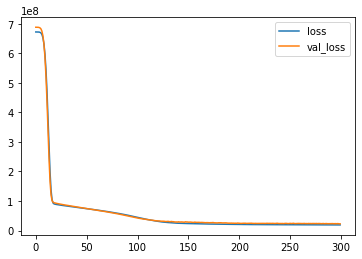

In [56]:
kayipVerisi.plot()
# eğer aşağıdaki tabloda val_loss ve loss birbirinden ayrılıyorsa sonlara doğru bir sıkıntı var demektir ya overfitting olmuş ya
# da başka bir sıkıntı.

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
tahminDizisi = model.predict(x_test)
tahminDizisi

array([[20925.111],
       [22710.57 ],
       [24724.979],
       ...,
       [25094.395],
       [ 8715.822],
       [24219.336]], dtype=float32)

In [60]:
mean_absolute_error(y_test, tahminDizisi)
# tahminimizle gerçek değerimiz arasında 3387 pound'luk bir fark var. Bu fark önemli mi değil mi buna biz karar veririz
# önemliyse o zaman daha başarılı bir model oluşturmaya çalışırız. Değilse modelimizle devam ederiz.

3387.393097824398

In [62]:
mean_squared_error(y_test, tahminDizisi)

22860511.343675725

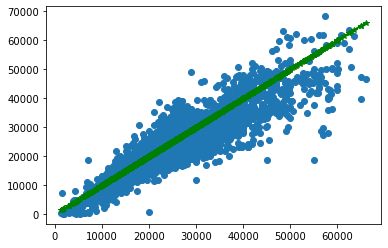

In [64]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,"g-*")
# verimizin ortasından geçen çizgiyi çizdik

In [88]:
yeniArabaSeries = dataFrame.drop( ["transmission","price"], axis=1).iloc[2]
yeniArabaSeries
# bu arabanın price değerini tahmin ettirerek bulmaya çalışıcaz

year          2016.0
mileage       6200.0
tax            555.0
mpg             28.0
engineSize       5.5
Name: 2, dtype: float64

In [89]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))
# serimizi reshape yaparak -1,5 ne demek bilmiyorum. values ile onu bir seriye dönüştürdük. Scale ettik aynı zamanda da

In [90]:
model.predict(yeniArabaSeries)
# arabamızın fiyatı 53113 pound olcakmış

array([[53113.21]], dtype=float32)

In [92]:
dataFrame.iloc[2]
# yakın bir tahmin yaptık 4k pound sapma olmuş. 

year                 2016
price               49948
transmission    Automatic
mileage              6200
tax                   555
mpg                    28
engineSize            5.5
Name: 2, dtype: object